## Package Installation

In [ ]:
pip install bambi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.9/107.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 1.8 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import math
import numpy as np
import bambi as bmb
import arviz as az
import statsmodels.api as sm


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#for athene bc can't find the d102projdata folder
data_2020 = pd.read_csv('/content/drive/MyDrive/DATA 102/Copy of candidate_summary_2020.csv')
house_2020 = pd.read_csv('/content/drive/MyDrive/DATA 102/Copy of houseelections2020.csv')
pres_2020 = pd.read_csv('/content/drive/MyDrive/DATA 102/Copy of preselections2020.csv')
sen_2020 = pd.read_csv('/content/drive/MyDrive/DATA 102/Copy of senelections2020.csv')

In [ ]:
data_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/candidate_summary_2020.csv')
house_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/houseelections2020.csv')
pres_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/preselections2020.csv')
sen_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/senelections2020.csv')

## DataFrames

### votes

In [ ]:
swing_states = ['PA', 'MN', 'WI', 'FL', 'AZ', 'NV']


In [ ]:
house_2020 = house_2020[['STATE ABBREVIATION', 'CANDIDATE NAME', 'TOTAL VOTES', 'PARTY',
       'PRIMARY VOTES', 'PRIMARY %', 'RUNOFF VOTES', 'RUNOFF %',
       'GENERAL VOTES ', 'GENERAL %',
       'PE WINNER INDICATOR', 'GE WINNER INDICATOR']]

In [ ]:
sen_2020 = sen_2020[['STATE ABBREVIATION', 'CANDIDATE NAME', 'TOTAL VOTES', 'PARTY',
       'PRIMARY VOTES', 'PRIMARY %', 'RUNOFF VOTES', 'RUNOFF %',
       'GENERAL VOTES ', 'GENERAL %',
       'PE WINNER INDICATOR', 'GE WINNER INDICATOR']]

In [ ]:
sen_2020 = sen_2020[sen_2020['CANDIDATE NAME'].notna()]
house_2020 = house_2020[house_2020['CANDIDATE NAME'].notna()]

In [ ]:
house_caps = []
for name in house_2020['CANDIDATE NAME']:
  house_caps.append(name.upper())

sen_caps = []
for name in sen_2020['CANDIDATE NAME']:
  sen_caps.append(name.upper())

In [ ]:
house_2020['name'] = house_caps
house_2020['Cand_Office'] = 'H'
sen_2020['name'] = sen_caps
sen_2020['Cand_Office'] = 'S'

In [ ]:
house_senate_2020 = pd.concat([house_2020, sen_2020], ignore_index=True)

In [ ]:
house_senate_2020.head(3)

,STATE ABBREVIATION,CANDIDATE NAME,TOTAL VOTES,PARTY,PRIMARY VOTES,PRIMARY %,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,PE WINNER INDICATOR,GE WINNER INDICATOR,name,Cand_Office
0,AL,"Carl, Jerry",NaN,R,"38,490",38.70%,"44,421",52.28%,"211,825",64.37%,W,W,"CARL, JERRY",H
1,AL,"Hightower, Bill",NaN,R,"37,283",37.48%,"40,552",47.72%,NaN,NaN,NaN,NaN,"HIGHTOWER, BILL",H
2,AL,"Pringle, Chris",NaN,R,"19,126",19.23%,NaN,NaN,NaN,NaN,NaN,NaN,"PRINGLE, CHRIS",H


In [ ]:
pres_2020 = pres_2020[['Summary of 2020 Presidential Primary Vote Totals by Party',	'Unnamed: 1']]
pres_2020 = pres_2020.rename(columns={'Summary of 2020 Presidential Primary Vote Totals by Party': 'Party',
                        'Unnamed: 1': 'Primary Vote Totals'}).dropna()

In [ ]:
import re

part_abv = []
for party in pres_2020['Party']:
  splitted = re.findall(r'\([A-Z]+\)', party)
  if len(splitted) == 1:
    part_abv.append(splitted[0][1:-1])
  else:
    part_abv.append(None)

In [ ]:
pres_2020['Party Abv'] = part_abv

In [ ]:
pres_2020

,Party,Primary Vote Totals,Party Abv
0,Democratic Party (D),"36,266,620",D
1,Republican Party (R),"19,635,660",R
2,American Independent (AIP),"56,568",AIP
3,Libertarian (LBT),"44,232",LBT
4,Green (GRE),"13,383",GRE
5,Peace and Freedom (PAF),"6,672",PAF
6,Constitution (CON),"1,919",CON
7,Green-Rainbow (GR),"1,326",GR
8,Total Primary Votes:,"56,026,380",None


### finance

In [ ]:
data_2020_finance = data_2020[['Cand_Name', 'Cand_State', 'Cand_Party_Affiliation', 'Cand_Office', 'Total_Receipt']]
data_2020_finance = data_2020_finance[data_2020_finance['Total_Receipt'] > 0].reset_index().drop('index', axis=1)

In [ ]:
data_2020.head(3)

,Link_Image,Cand_Name,Cand_Id,Cand_Office,Cand_Office_St,Cand_Office_Dist,Cand_Party_Affiliation,Cand_Incumbent_Challenger_Open_Seat,Total_Receipt,Total_Disbursement,...,Individual_Refund,Party_Committee_Refund,Other_Committee_Refund,Total_Contribution_Refund,Other_Disbursements,Net_Contribution,Net_Operating_Expenditure,Cash_On_Hand_BOP,Debt_Owe_To_Committee,Coverage_Start_Date
0,https://www.fec.gov/data/candidate/P00015891/?...,"I, KURIOS",P00015891,P,US,0.0,IND,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
1,https://www.fec.gov/data/candidate/P00015909/?...,"ANFANG, MICHAEL",P00015909,P,US,0.0,UN,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
2,https://www.fec.gov/data/candidate/S0SC00255/?...,"KNIGHTS, MATTHEW BALDWIN",S0SC00255,S,SC,0.0,DEM,CHALLENGER,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


In [ ]:
#grouped_by_state = data_clean_by_state.groupby(by=['Cand_State', 'Cand_Party_Affiliation', 'Cand_Office'], dropna=False).sum()
#grouped_by_state = grouped_by_state[grouped_by_state['Total_Receipt'] > 0] # only those that actually got funding
#grouped_by_state

In [ ]:
# to access = grouped_by_state['Total_Receipt']['CA']['DEM']['P']

### combining finance + voting

In [ ]:
finance = data_2020_finance
house_senate_voting = house_senate_2020

In [ ]:
house_senate_voting = house_senate_voting.rename(columns={"name": "Cand_Name",
                                                          "STATE ABBREVIATION": "Cand_State"})

In [ ]:
df_merged = house_senate_voting.merge(finance, on=['Cand_Name', 'Cand_Office', 'Cand_State'])

In [ ]:
df_merged.head(3)


,Cand_State,CANDIDATE NAME,TOTAL VOTES,PARTY,PRIMARY VOTES,PRIMARY %,RUNOFF VOTES,RUNOFF %,GENERAL VOTES,GENERAL %,PE WINNER INDICATOR,GE WINNER INDICATOR,Cand_Name,Cand_Office,Cand_Party_Affiliation,Total_Receipt
0,AL,"Hightower, Bill",NaN,R,"37,283",37.48%,"40,552",47.72%,NaN,NaN,NaN,NaN,"HIGHTOWER, BILL",H,REP,1323944.09
1,AL,"Castorani, John",NaN,R,"1,468",1.48%,NaN,NaN,NaN,NaN,NaN,NaN,"CASTORANI, JOHN",H,REP,26809.68
2,AL,"Averhart, James",NaN,D,"21,022",40.35%,"15,840",56.69%,"116,949",35.54%,W,NaN,"AVERHART, JAMES",H,DEM,80094.95


## EDA (w/ 2020 data)

In [ ]:
# dropping columns with a lot of missing values.
threshold = 0.5 * len(data_2020)
data_clean = data_2020.dropna(thresh=threshold, axis=1)
print(data_clean.isnull().sum())

Link_Image                                0
Cand_Name                                 0
Cand_Id                                   0
Cand_Office                               0
Cand_Office_St                            0
Cand_Office_Dist                          7
Cand_Party_Affiliation                    6
Cand_Incumbent_Challenger_Open_Seat       6
Total_Receipt                             0
Total_Disbursement                        0
Cash_On_Hand_COP                         10
Debt_Owed_By_Committee                   48
Cand_Street_1                           143
Cand_City                                 2
Cand_State                              135
Cand_Zip                                139
Individual_Itemized_Contribution          0
Individual_Unitemized_Contribution        0
Individual_Contribution                   0
Other_Committee_Contribution              0
Party_Committee_Contribution              0
Cand_Contribution                         0
Total_Contribution              

In [ ]:
#to handle more missing values for cand_party_affiliation and cand_incumbent_challenger_open_seat
for i in ['Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat']:
    data_clean.loc[:, i] = data_clean[i].fillna(data_clean[i].mode()[0])
numerical_columns = ['Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 'Debt_Owe_To_Committee']
for j in ['Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 'Debt_Owe_To_Committee']:
    data_clean.loc[:, j] = data_clean[j].fillna(data_clean[j].mean())

In [ ]:
data_clean = data_clean.dropna()

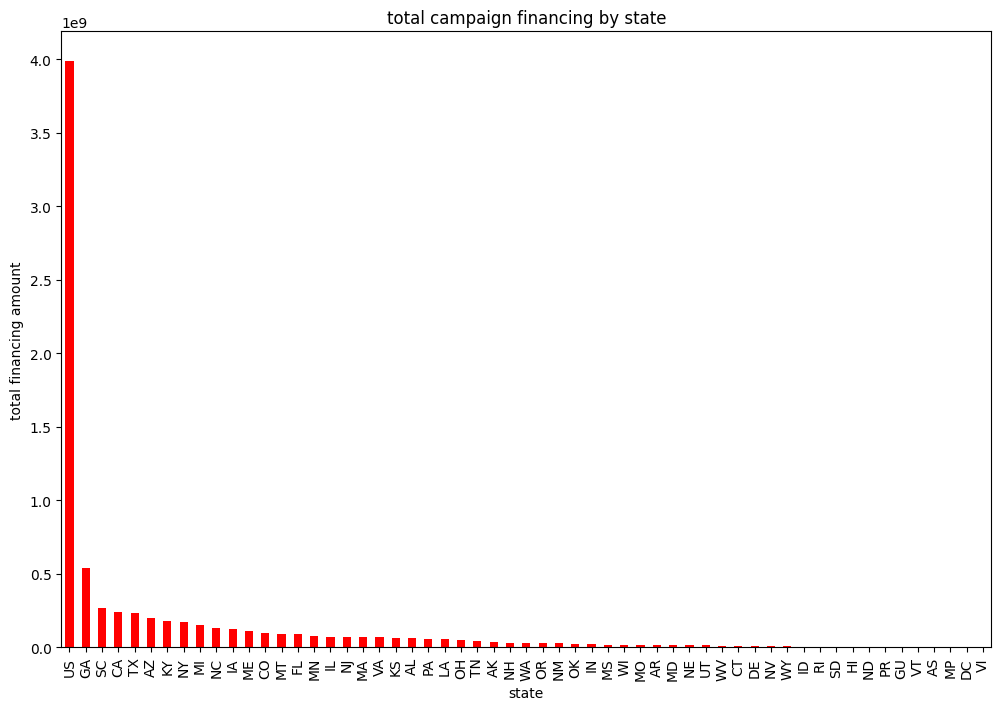

In [ ]:
plt.figure(figsize=(12, 8))
data_clean.groupby('Cand_Office_St')['Total_Receipt'].sum().sort_values(ascending=False).plot(kind='bar', color='red')
plt.title('total campaign financing by state')
plt.xlabel('state')
plt.ylabel('total financing amount')
plt.show()


<ipython-input-30-e2627ace66d8>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Cand_Office_St', y='Total_Receipt', hue='Cand_Party_Affiliation', data=swing_state_data, ci=None)


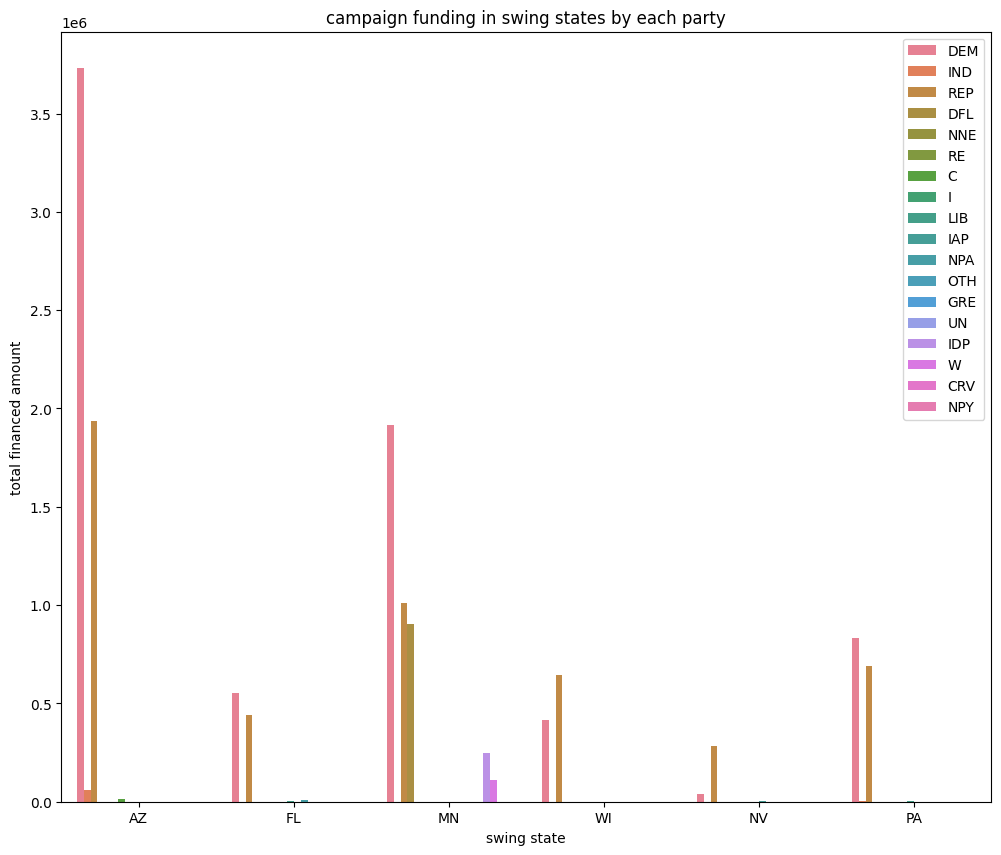

In [ ]:
plt.figure(figsize=(12, 10))
swing_states = ['PA', 'MN', 'WI', 'FL', 'AZ', 'NV']
swing_state_data = data_clean[data_clean['Cand_Office_St'].isin(swing_states)]
sns.barplot(x='Cand_Office_St', y='Total_Receipt', hue='Cand_Party_Affiliation', data=swing_state_data, ci=None)
plt.legend(loc='upper right')
plt.title('campaign funding in swing states by each party')
plt.xlabel('swing state')
plt.ylabel('total financed amount')
plt.show()

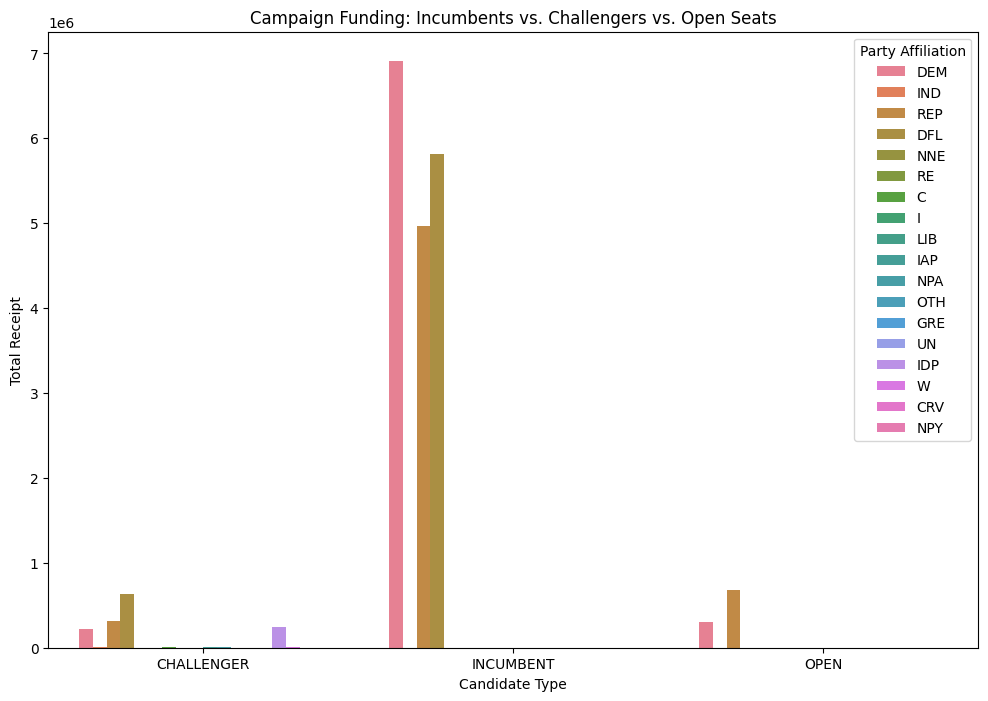

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(
    x="Cand_Incumbent_Challenger_Open_Seat",
    y="Total_Receipt",
    hue="Cand_Party_Affiliation",
    data=swing_state_data,
    errorbar=None
)
plt.title("Campaign Funding: Incumbents vs. Challengers vs. Open Seats")
plt.xlabel("Candidate Type")
plt.ylabel("Total Receipt")
plt.legend(title="Party Affiliation", loc="upper right")
plt.show()

In [ ]:
#explanation

In general, the Democrats received more money than Repblicans in swing states. Nevada in particular, has significantly more funding for Democrats, double of the other swing states. Wisconsin is the only state where the Republicans received more funding. We can use this funding amount to look for correlation in how the state voted, particularly in specific areas of the state and compare it to income levels.

In [ ]:
#visualization for endorsements and votes (question 2)

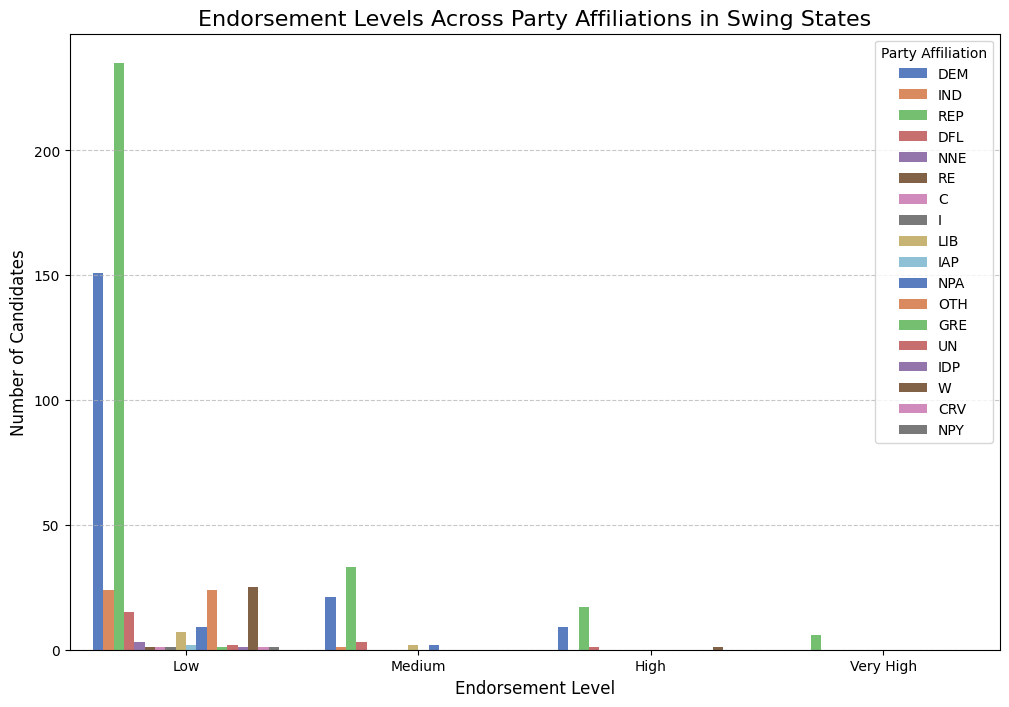

In [ ]:
swing_state_data = swing_state_data.copy()  # Create a deep copy to avoid slicing issues
swing_state_data.loc[:, 'Endorsement_Level'] = pd.cut(
    swing_state_data['Cand_Contribution'],
    bins=[-1, 1000, 10000, 100000, swing_state_data['Cand_Contribution'].max()],
    labels=['Low', 'Medium', 'High', 'Very High']
)

plt.figure(figsize=(12, 8))
sns.countplot(
    x='Endorsement_Level',
    hue='Cand_Party_Affiliation',
    data=swing_state_data,
    palette="muted"
)
plt.title("Endorsement Levels Across Party Affiliations in Swing States", fontsize=16)
plt.xlabel("Endorsement Level", fontsize=12)
plt.ylabel("Number of Candidates", fontsize=12)
plt.legend(title="Party Affiliation", loc="upper right")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

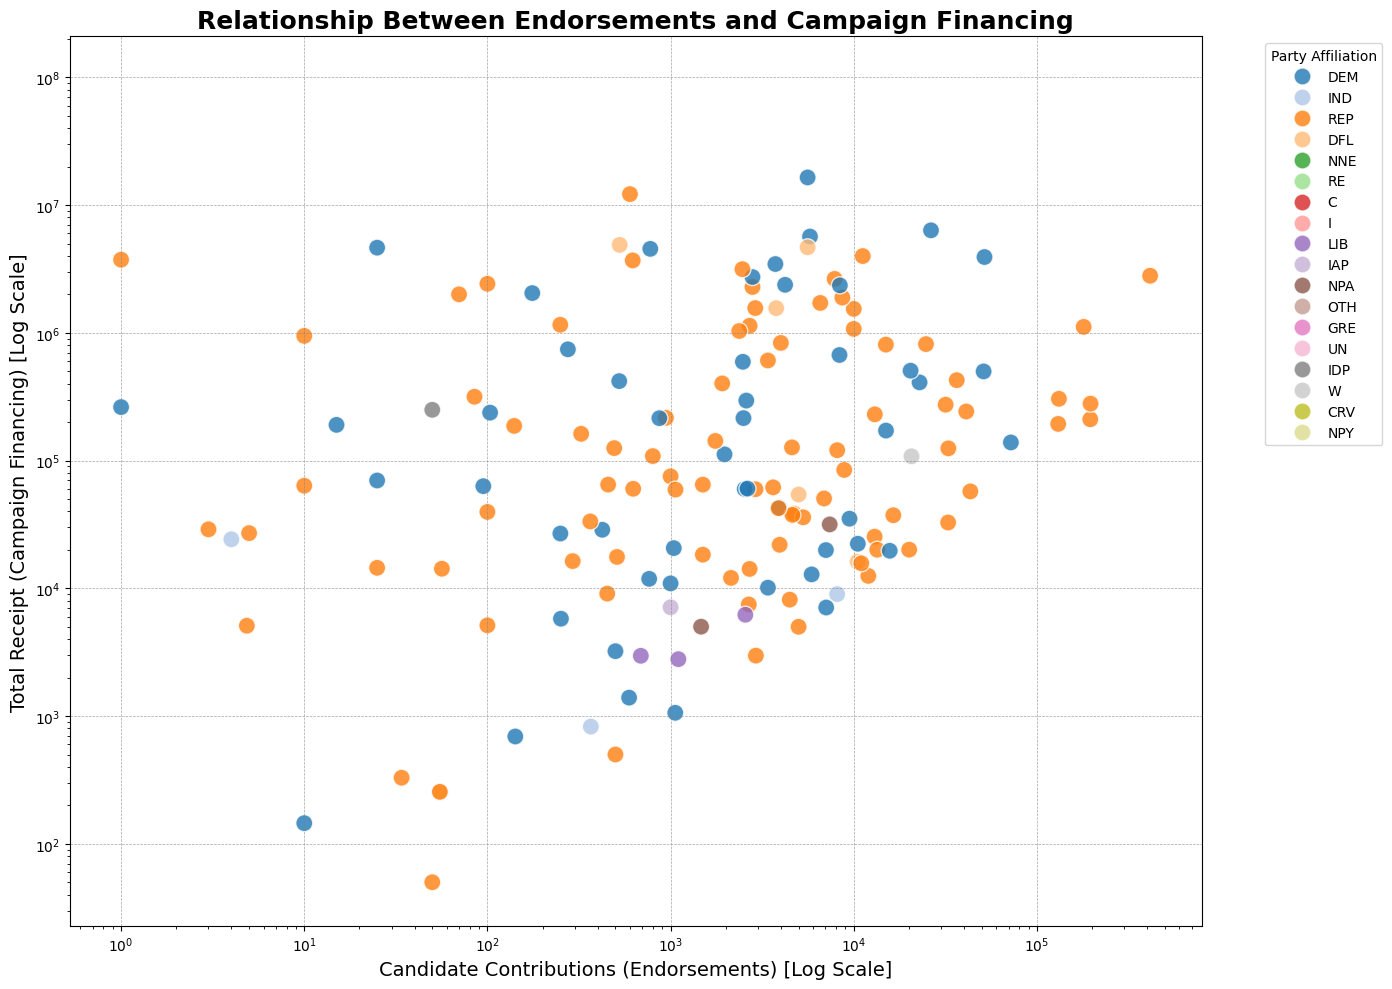

In [ ]:
plt.figure(figsize=(14, 10))
sns.scatterplot(
    x='Cand_Contribution',
    y='Total_Receipt',
    hue='Cand_Party_Affiliation',
    data=swing_state_data,
    palette="tab20",
    s=150,
    alpha=0.8
)

plt.xscale("log")
plt.yscale("log")

plt.title("Relationship Between Endorsements and Campaign Financing", fontsize=18, fontweight="bold")
plt.xlabel("Candidate Contributions (Endorsements) [Log Scale]", fontsize=14)
plt.ylabel("Total Receipt (Campaign Financing) [Log Scale]", fontsize=14)

plt.legend(title="Party Affiliation", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)

plt.grid(color="gray", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

## Bayesian Hierarchical

In [ ]:
Funding = 'Total_Receipt'
Votes = 'PRIMARY VOTES'
data = df_merged[[Funding, Votes, 'PARTY', 'Cand_State', 'Cand_Office']]

In [ ]:
new_votes = []
for vote in data[Votes]:
  str_vote = str(vote).replace(',','')
  new_votes.append(re.sub(r'\D', '', str_vote))

In [ ]:
data[Votes] = new_votes
data = data[data[Votes] != '']
data[Votes] = data[Votes].astype(int)

<ipython-input-35-0a2b07226f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[Votes] = new_votes
<ipython-input-35-0a2b07226f79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[Votes] = data[Votes].astype(int)


In [ ]:
swing_data = data[data['Cand_State'].isin(['PA', 'MN', 'WI', 'FL', 'AZ', 'NV'])]
swing_data = swing_data[swing_data['Cand_Office'] == 'H']
swing_data

,Total_Receipt,PRIMARY VOTES,PARTY,Cand_State,Cand_Office
13,3416902.11,47083,D,AZ,H
14,419049.50,33248,D,AZ,H
15,1715148.40,40310,R,AZ,H
16,1898759.09,77517,D,AZ,H
17,17806.00,24035,D,AZ,H
...,...,...,...,...,...
605,230177.89,18835,R,WI,H
606,370492.34,43710,D,WI,H
607,2652454.74,62142,R,WI,H
608,1276509.66,51139,D,WI,H


In [ ]:
swing_data_PA = swing_data[swing_data['Cand_State'] == 'PA']
swing_data_PA["PRIMARY_VOTES"] = 100 * swing_data_PA["PRIMARY VOTES"]/sum(swing_data_PA["PRIMARY VOTES"])
swing_data_PA["PRIMARY_VOTES"] = swing_data_PA["PRIMARY_VOTES"].astype(int)
swing_data_PA['Total_Receipt_scaled'] = swing_data_PA['Total_Receipt']/10000
#swing_data_PA

<ipython-input-37-22f10dd9288a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_PA["PRIMARY_VOTES"] = 100 * swing_data_PA["PRIMARY VOTES"]/sum(swing_data_PA["PRIMARY VOTES"])
<ipython-input-37-22f10dd9288a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_PA["PRIMARY_VOTES"] = swing_data_PA["PRIMARY_VOTES"].astype(int)
<ipython-input-37-22f10dd9288a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:





swing_data_MN = swing_data[swing_data['Cand_State'] == 'MN']
swing_data_MN["PRIMARY_VOTES"] = 100 * swing_data_MN["PRIMARY VOTES"]/sum(swing_data_MN["PRIMARY VOTES"])
swing_data_MN["PRIMARY_VOTES"] = swing_data_MN["PRIMARY_VOTES"].astype(int)
swing_data_MN['Total_Receipt_scaled'] = swing_data_MN['Total_Receipt']/10000


<ipython-input-38-0be5fef0abfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_MN["PRIMARY_VOTES"] = 100 * swing_data_MN["PRIMARY VOTES"]/sum(swing_data_MN["PRIMARY VOTES"])
<ipython-input-38-0be5fef0abfe>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_MN["PRIMARY_VOTES"] = swing_data_MN["PRIMARY_VOTES"].astype(int)
<ipython-input-38-0be5fef0abfe>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
swing_data_WI = swing_data[swing_data['Cand_State'] == 'WI']
swing_data_WI["PRIMARY_VOTES"] = 100 * swing_data_WI["PRIMARY VOTES"]/sum(swing_data_WI["PRIMARY VOTES"])
swing_data_WI["PRIMARY_VOTES"] = swing_data_WI["PRIMARY_VOTES"].astype(int)
swing_data_WI['Total_Receipt_scaled'] = swing_data_WI['Total_Receipt']/10000


<ipython-input-39-44ee05d2a5c2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_WI["PRIMARY_VOTES"] = 100 * swing_data_WI["PRIMARY VOTES"]/sum(swing_data_WI["PRIMARY VOTES"])
<ipython-input-39-44ee05d2a5c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_WI["PRIMARY_VOTES"] = swing_data_WI["PRIMARY_VOTES"].astype(int)
<ipython-input-39-44ee05d2a5c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
swing_data_FL = swing_data[swing_data['Cand_State'] == 'FL']
swing_data_FL["PRIMARY_VOTES"] = 100 * swing_data_FL["PRIMARY VOTES"]/sum(swing_data_FL["PRIMARY VOTES"])
swing_data_FL["PRIMARY_VOTES"] = swing_data_FL["PRIMARY_VOTES"].astype(int)
swing_data_FL['Total_Receipt_scaled'] = swing_data_FL['Total_Receipt']/10000


<ipython-input-40-1ce8694c0b23>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_FL["PRIMARY_VOTES"] = 100 * swing_data_FL["PRIMARY VOTES"]/sum(swing_data_FL["PRIMARY VOTES"])
<ipython-input-40-1ce8694c0b23>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_FL["PRIMARY_VOTES"] = swing_data_FL["PRIMARY_VOTES"].astype(int)
<ipython-input-40-1ce8694c0b23>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
swing_data_AZ = swing_data[swing_data['Cand_State'] == 'AZ']
swing_data_AZ["PRIMARY_VOTES"] = 100 * swing_data_AZ["PRIMARY VOTES"]/sum(swing_data_AZ["PRIMARY VOTES"])
swing_data_AZ["PRIMARY_VOTES"] = swing_data_AZ["PRIMARY_VOTES"].astype(int)
swing_data_AZ['Total_Receipt_scaled'] = swing_data_AZ['Total_Receipt']/10000
swing_data_AZ

<ipython-input-41-bd9e005b42f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_AZ["PRIMARY_VOTES"] = 100 * swing_data_AZ["PRIMARY VOTES"]/sum(swing_data_AZ["PRIMARY VOTES"])
<ipython-input-41-bd9e005b42f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_AZ["PRIMARY_VOTES"] = swing_data_AZ["PRIMARY_VOTES"].astype(int)
<ipython-input-41-bd9e005b42f6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

,Total_Receipt,PRIMARY VOTES,PARTY,Cand_State,Cand_Office,PRIMARY_VOTES,Total_Receipt_scaled
13,3416902.11,47083,D,AZ,H,8,341.690211
14,419049.50,33248,D,AZ,H,6,41.904950
15,1715148.40,40310,R,AZ,H,7,171.514840
16,1898759.09,77517,D,AZ,H,14,189.875909
17,17806.00,24035,D,AZ,H,4,1.780600
18,304518.30,25049,R,AZ,H,4,30.451830
19,41941.53,29272,R,AZ,H,5,4.194153
21,110341.74,48118,R,AZ,H,8,11.034174
22,77167.50,34348,D,AZ,H,6,7.716750
23,5784.00,11852,D,AZ,H,2,0.578400


In [ ]:
swing_data_NV = swing_data[swing_data['Cand_State'] == 'NV']
swing_data_NV["PRIMARY_VOTES"] = 100 * swing_data_NV["PRIMARY VOTES"]/sum(swing_data_NV["PRIMARY VOTES"])
swing_data_NV["PRIMARY_VOTES"] = swing_data_NV["PRIMARY_VOTES"].astype(int)
swing_data_NV['Total_Receipt_scaled'] = swing_data_NV['Total_Receipt']/10000
#swing_data_AZ

<ipython-input-42-1a586eccaa3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_NV["PRIMARY_VOTES"] = 100 * swing_data_NV["PRIMARY VOTES"]/sum(swing_data_NV["PRIMARY VOTES"])
<ipython-input-42-1a586eccaa3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  swing_data_NV["PRIMARY_VOTES"] = swing_data_NV["PRIMARY_VOTES"].astype(int)
<ipython-input-42-1a586eccaa3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [ ]:
def get_model(df):
  with pm.Model() as beta_binomial_model:

      # priors for param
      alpha = pm.Normal("alpha", mu=0, sigma=5) #intercept
      beta = pm.Normal("beta", mu=0, sigma=5) #coef

      # Probability of success follows regression
      logit_theta = alpha + beta * df['Total_Receipt_scaled']
      theta = pm.Deterministic("theta", pm.math.sigmoid(logit_theta))

      # Observed votes follow Binomial likelihood
      Y_obs = pm.Binomial('Y_obs', n=sum(df["PRIMARY VOTES"]), p=theta, observed=df['PRIMARY VOTES'])

      # Sampling
      trace = pm.sample(2000, chains=4, random_seed=0, return_inferencedata=False)
  return trace

In [ ]:
trace = get_model(swing_data_AZ)

Output()

Output()

Output()

Output()

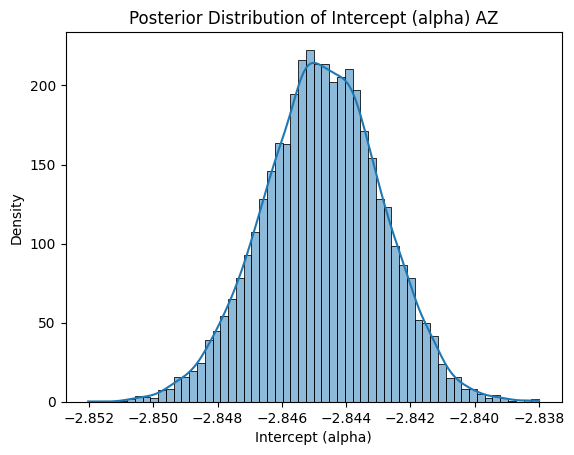

Mean: -2.8447366571535913 St Dev: 0.0018366359632321465
95% Credible Interval for alpha: [-2.84839314 -2.84122982]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) AZ")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")
alpha_credible_interval = np.percentile(alpha_samples, [2.5, 97.5])
print(f"95% Credible Interval for alpha: {alpha_credible_interval}")

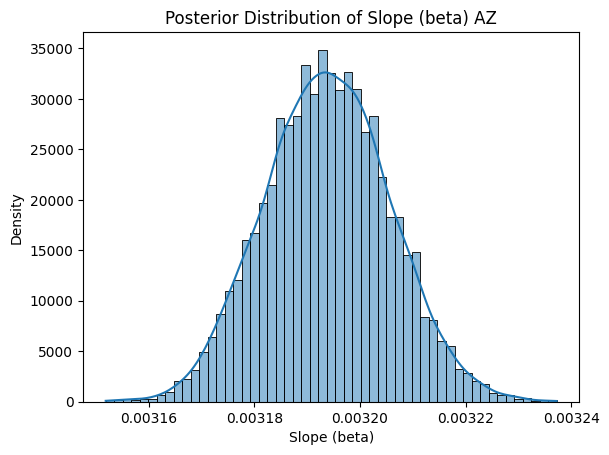

Mean: 0.003193846273637747 St Dev: 1.1825570731487728e-05
95% Credible Interval for beta: [0.00317124 0.00321718]


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) AZ")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")
beta_credible_interval = np.percentile(beta_samples, [2.5, 97.5])
print(f"95% Credible Interval for beta: {beta_credible_interval}")

Mean: 0.07159569521299872 St Dev: 0.025732415365278333
95% Credible Interval for beta: [0.05513458 0.13171579]


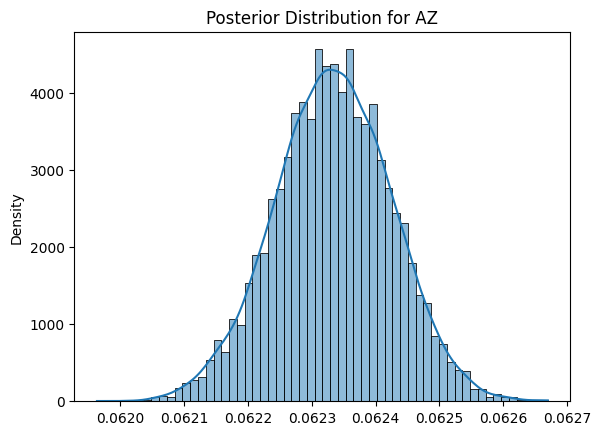

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde = True, stat = 'density')
sns_plot.set_title("Posterior Distribution for AZ")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")
credible_interval = np.percentile(posterior_estimates, [2.5, 97.5])
print(f"95% Credible Interval for beta: {credible_interval}")

In [ ]:
trace = get_model(swing_data_PA)

Output()

Output()

Output()

Output()

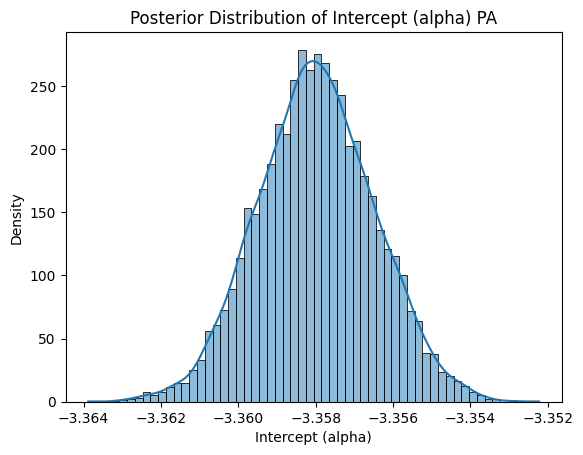

Mean: -3.3579829498293203 St Dev: 0.0015066501254536954


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) PA")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")

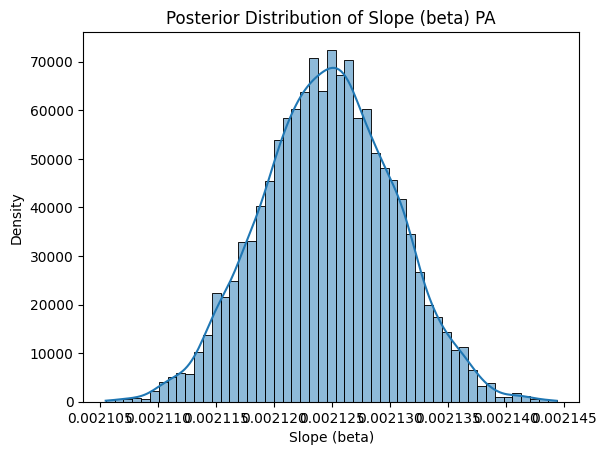

Mean: 0.002124613881956118 St Dev: 5.706495601128893e-06


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) PA")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")

Mean: 0.04762653594051555 St Dev: 0.016897655360261058


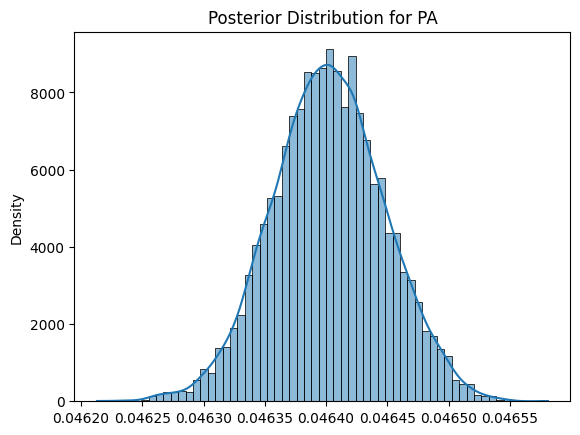

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde= True, stat = 'density')
sns_plot.set_title("Posterior Distribution for PA")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")

In [ ]:
trace = get_model(swing_data_MN)

Output()

Output()

Output()

Output()

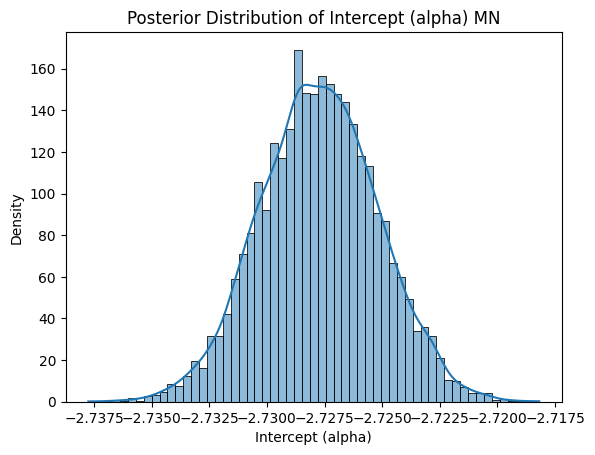

Mean: -2.7277350684309085 St Dev: 0.0025490679670871143


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) MN")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")

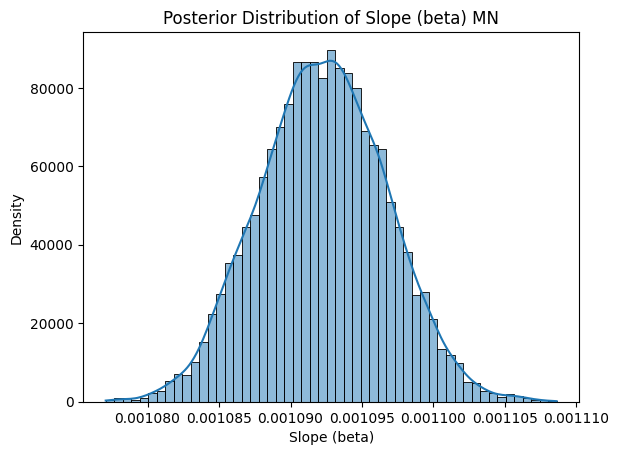

Mean: 0.0010922751461393892 St Dev: 4.436444658939217e-06


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) MN")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")

Mean: 0.08338350202353904 St Dev: 0.037795055483840996


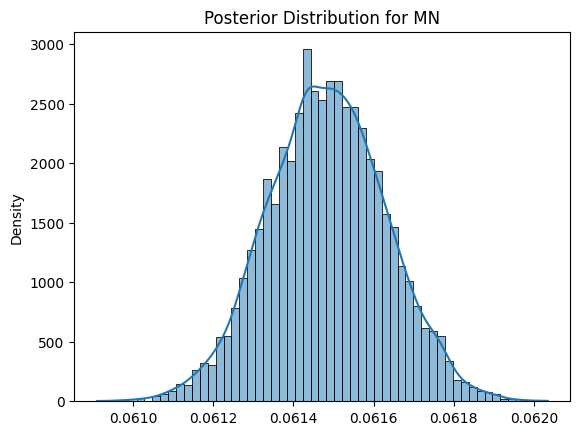

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde= True, stat = 'density')
sns_plot.set_title("Posterior Distribution for MN")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")

In [ ]:
trace = get_model(swing_data_WI)

Output()

Output()

Output()

Output()

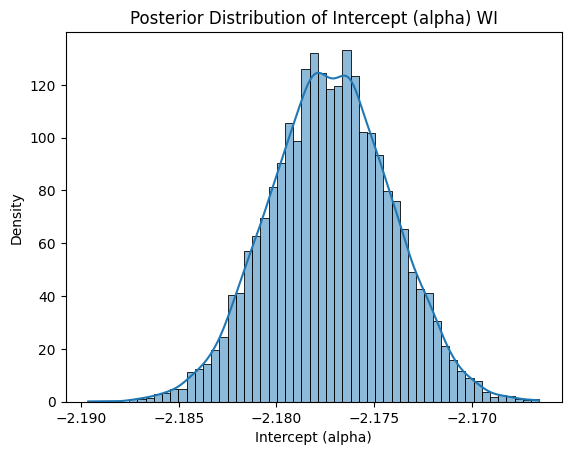

Mean: -2.1772446850139695 St Dev: 0.0031044005068656937


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) WI")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")

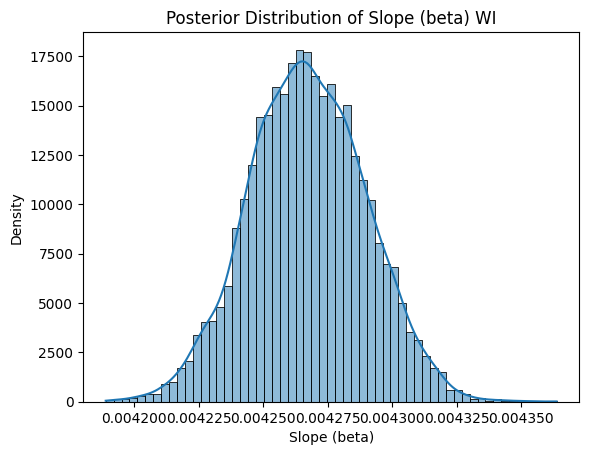

Mean: 0.004267242523459982 St Dev: 2.2459048826295308e-05


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) WI")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")

Mean: 0.14284376541987925 St Dev: 0.05132082170919542


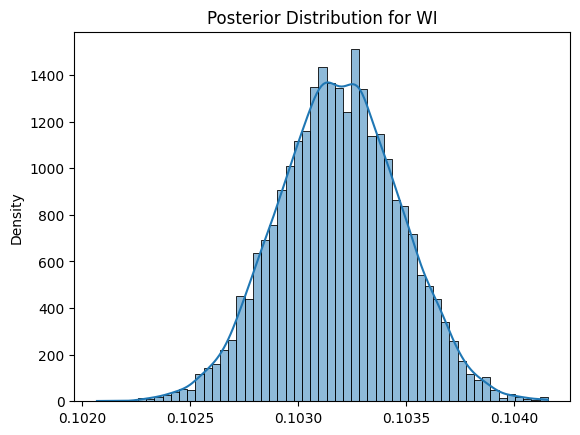

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde= True, stat = 'density')
sns_plot.set_title("Posterior Distribution for WI")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")

In [ ]:
trace = get_model(swing_data_FL)

Output()

Output()

Output()

Output()

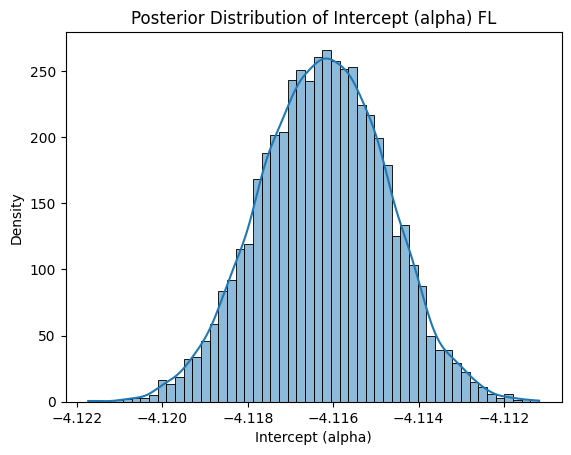

Mean: -4.116224501602068 St Dev: 0.0014737766472009844


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) FL")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")

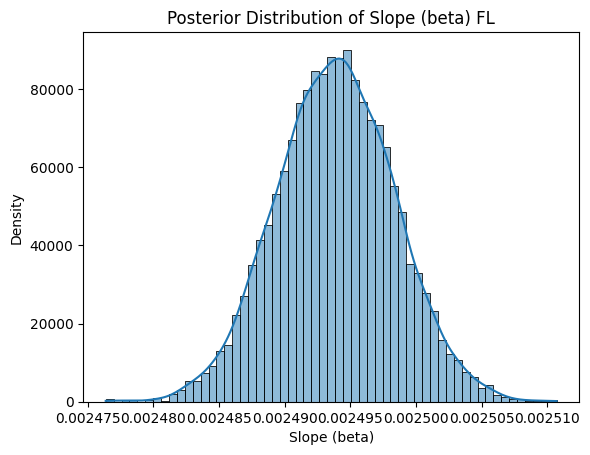

Mean: 0.002493864166750897 St Dev: 4.4841514559614035e-06


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) FL")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")

Mean: 0.022749822753347436 St Dev: 0.015684880503974347


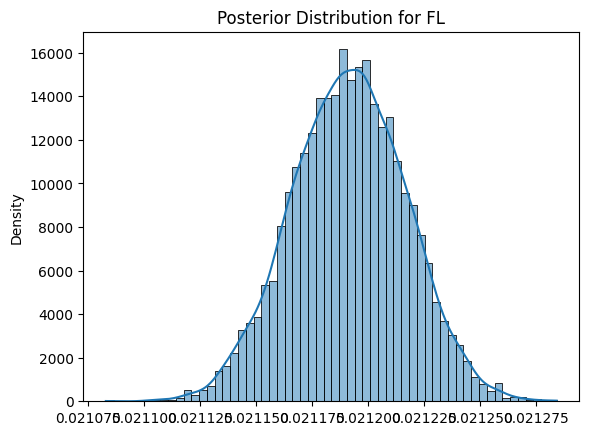

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde= True, stat = 'density')
sns_plot.set_title("Posterior Distribution for FL")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")

In [ ]:
trace = get_model(swing_data_NV)

Output()

Output()

Output()

Output()

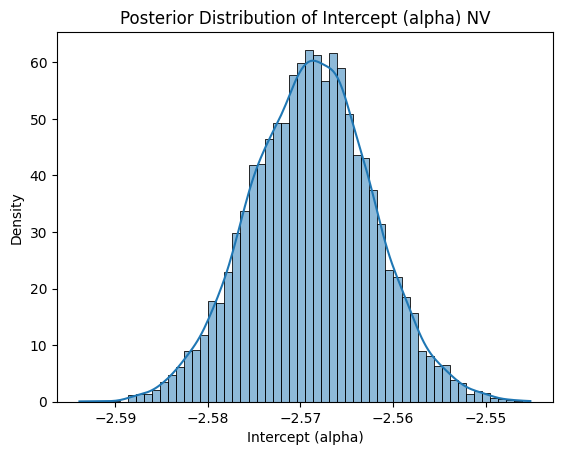

Mean: -2.5688090042358662 St Dev: 0.006543202114054032


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Extract posterior samples for alpha (intercept)
alpha_samples = trace['alpha']

# Plot posterior distribution
sns.histplot(alpha_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Intercept (alpha) NV")
plt.xlabel("Intercept (alpha)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {alpha_samples.mean()} St Dev: {alpha_samples.std()}")

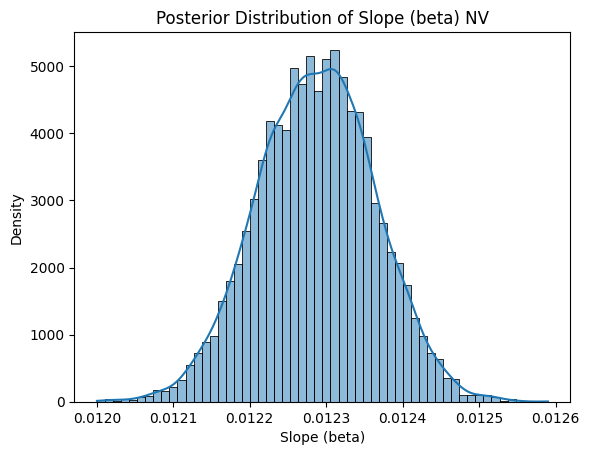

Mean: 0.01228710795546835 St Dev: 7.677746718460791e-05


In [ ]:
# Extract posterior samples for beta (slope)
beta_samples = trace['beta']

# Plot posterior distribution
sns.histplot(beta_samples, kde=True, stat='density')
plt.title("Posterior Distribution of Slope (beta) NV")
plt.xlabel("Slope (beta)")
plt.ylabel("Density")
plt.show()
print(f"Mean: {beta_samples.mean()} St Dev: {beta_samples.std()}")

Mean: 0.11092653429002282 St Dev: 0.0862679936505242


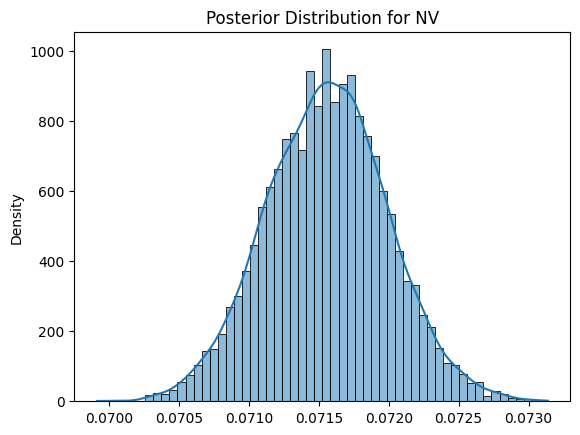

In [ ]:
thetas = trace['theta']
sns_plot = sns.histplot(x = thetas[:, 1], kde= True, stat = 'density')
sns_plot.set_title("Posterior Distribution for NV")
posterior_estimates = thetas[0]
print(f"Mean: {posterior_estimates.mean()} St Dev: {posterior_estimates.std()}")

In [ ]:
#glm but we can't use it
with pm.Model() as model:
    # Priors for the coefficients
    q0 = pm.Flat('q0')
    q1 = pm.Flat('q1')

    # Linear model for the logit of p
    logit_p = q0 + q1 * swing_data_AZ["Total_Receipt_scaled"]
    p = pm.Deterministic('p', pm.math.sigmoid(logit_p))  # Convert logit to probability

    # Binomial likelihood
    Y_obs = pm.Binomial('Y_obs', n=100, p=p, observed=swing_data_AZ['PRIMARY_VOTES'])

    # Sampling
    trace = pm.sample(2000, chains=4, random_seed=0, return_inferencedata=True)


Output()

Output()

Output()

Output()

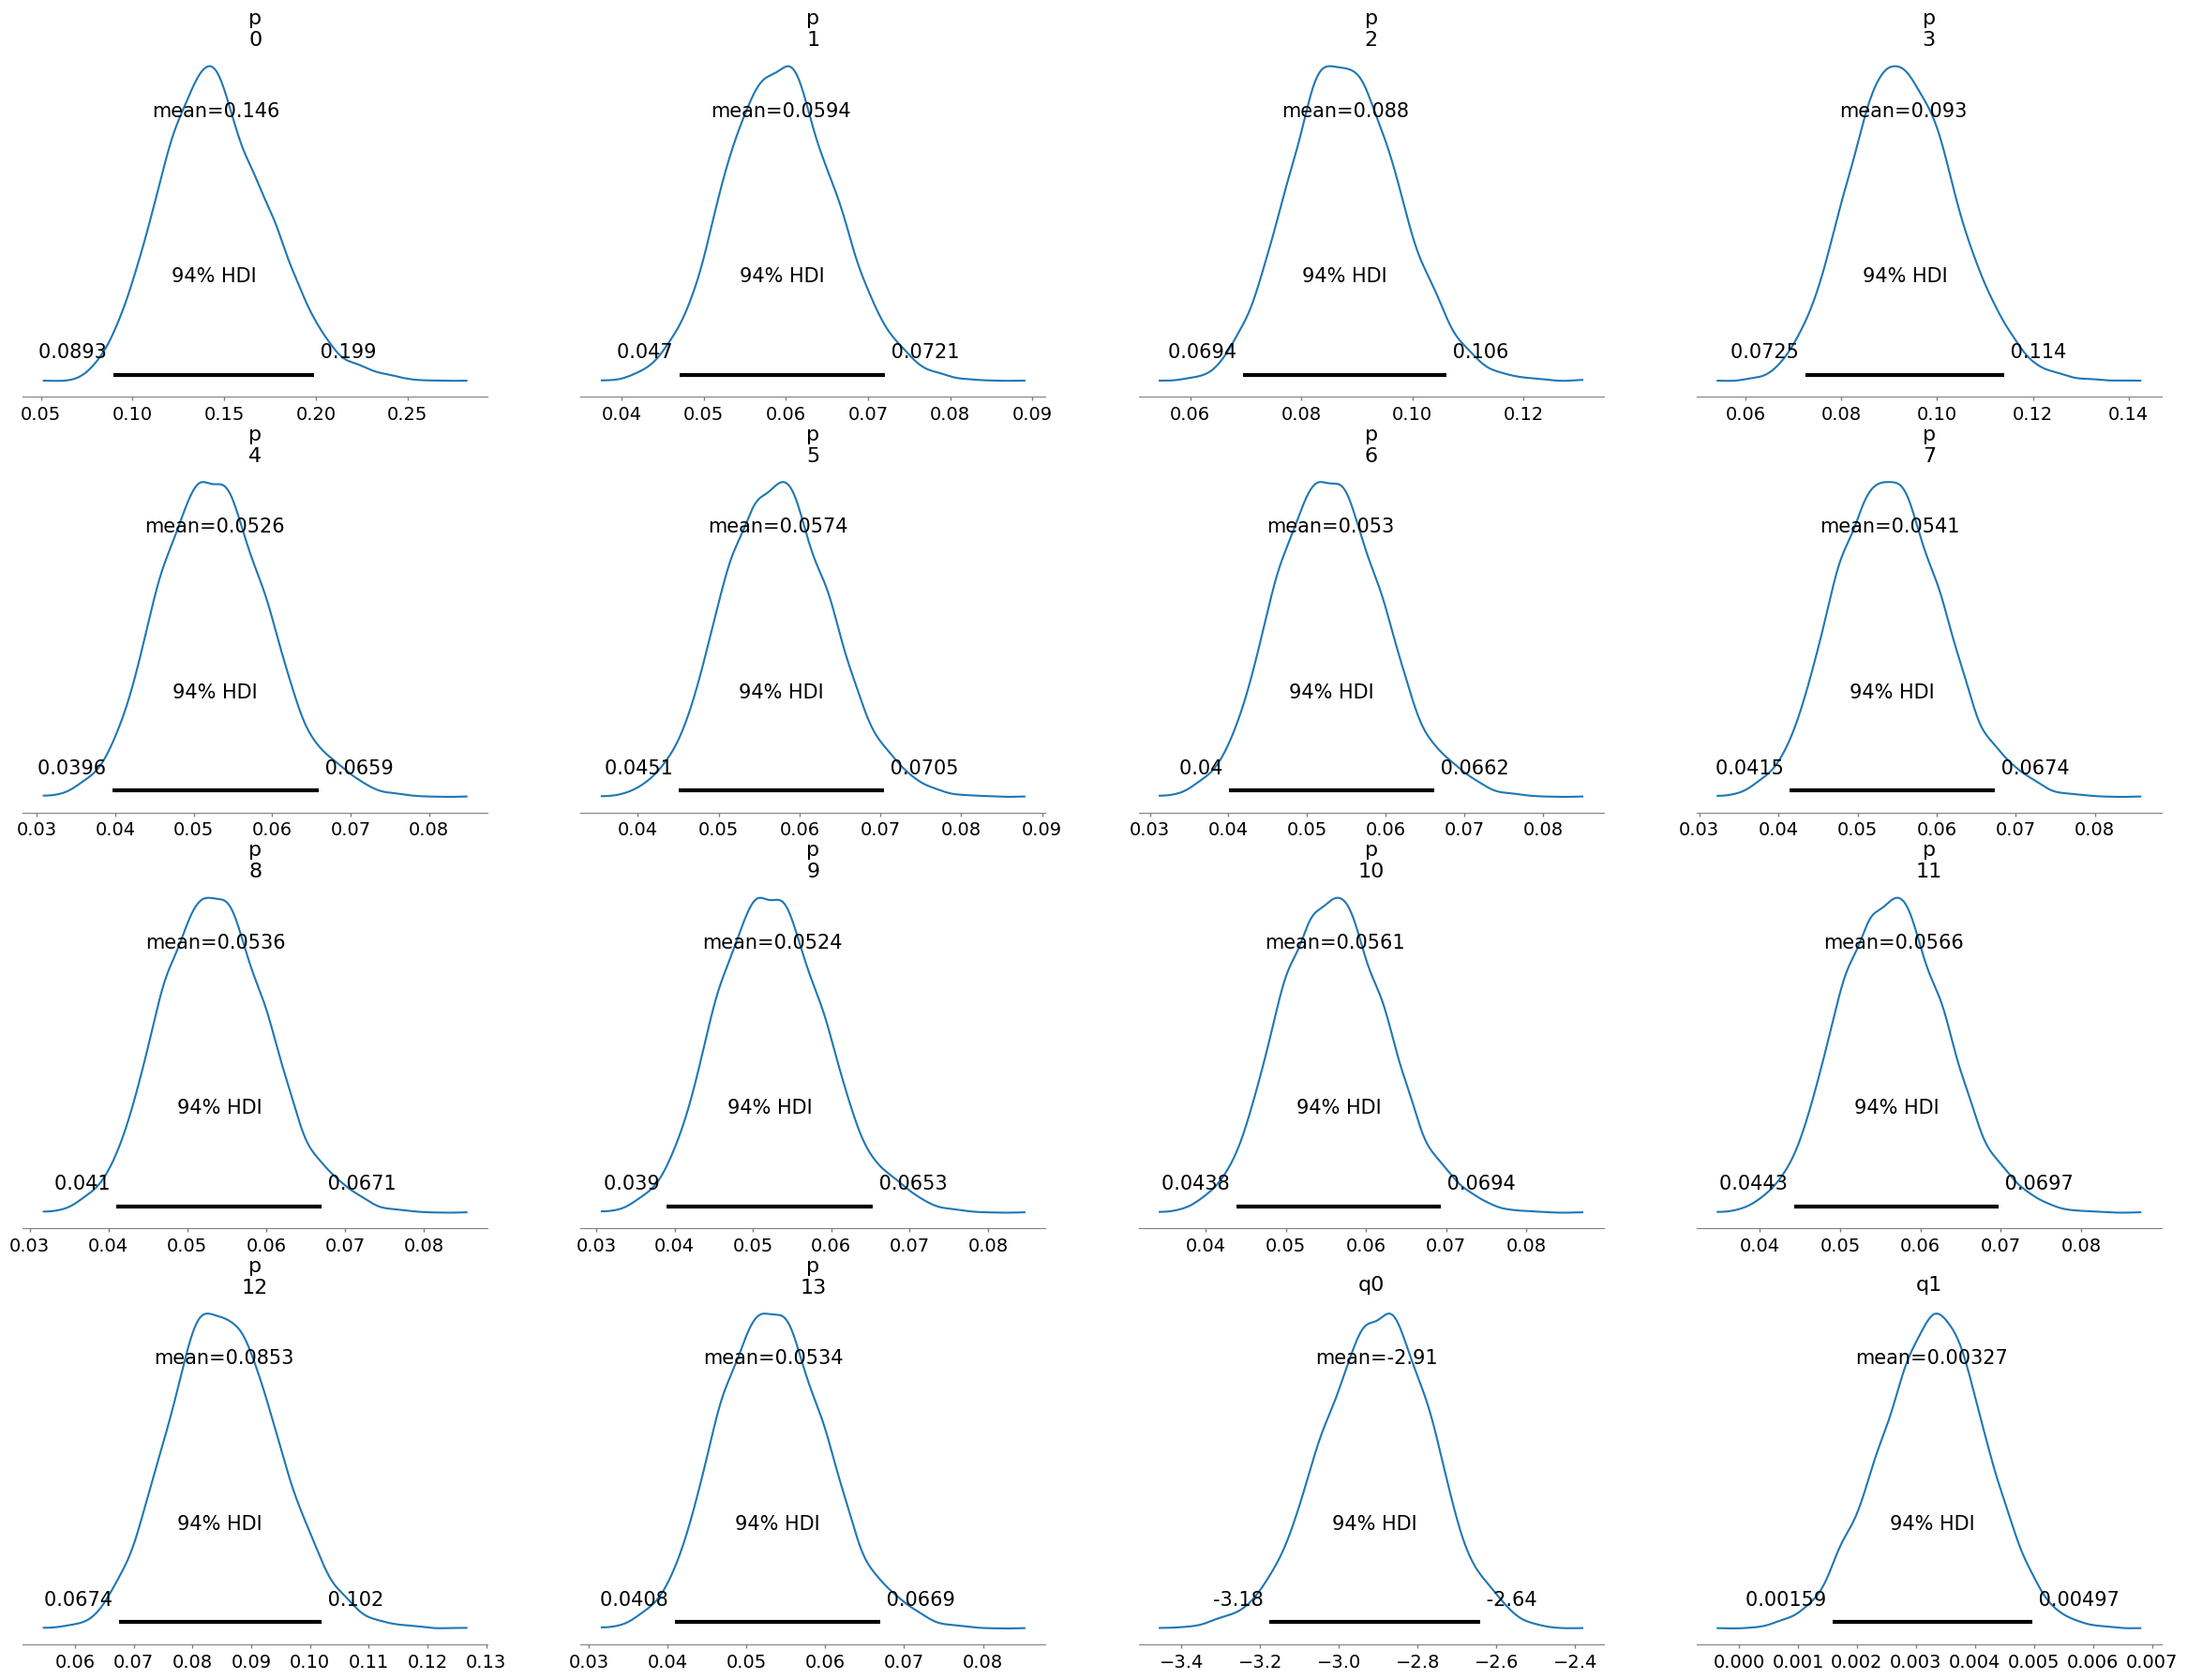

In [ ]:
az.plot_posterior(trace, round_to=3)
plt.show()

In [ ]:
model = bmb.Model('PRIMARY_VOTES ~ Total_Receipt', data=swing_data_AZ, family='binomial', link='logit')
fitted_model = model.fit(random_seed=0)

# Summarize and plot the posterior
az.plot_posterior(fitted_model, round_to=3)
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

## Causal model

In [ ]:
Funding = 'Total_Receipt'
Votes = 'PRIMARY VOTES'
data = df_merged[[Funding, Votes, 'PARTY', 'Cand_State', 'Cand_Office']]

In [ ]:
new_votes = []
for vote in data[Votes]:
  str_vote = str(vote).replace(',','')
  new_votes.append(re.sub(r'\D', '', str_vote))

In [ ]:
data[Votes] = new_votes
data = data[data[Votes] != '']
data[Votes] = data[Votes].astype(int)

<ipython-input-74-0a2b07226f79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[Votes] = new_votes
<ipython-input-74-0a2b07226f79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[Votes] = data[Votes].astype(int)


In [ ]:
swing_data = data[data['Cand_State'].isin(['PA', 'MN', 'WI', 'FL', 'AZ', 'NV'])]
swing_data = swing_data[swing_data['Cand_Office'] == 'H']

In [ ]:
swing_total_votes = swing_data[['Cand_State', 'PRIMARY VOTES']].groupby(['Cand_State']).sum()

In [ ]:

swing_rep_combined = swing_data[(swing_data['PARTY']  == "R")]
swing_rep_combined = swing_rep_combined[['Cand_State', 'Total_Receipt', 'PRIMARY VOTES']].groupby(['Cand_State']).sum()

In [ ]:
swing_rep_combined['vote %'] = swing_rep_combined['PRIMARY VOTES'] / swing_total_votes['PRIMARY VOTES']
swing_rep_combined['sigma_int'] = 0.5
swing_rep_combined['sigma_coef'] = 0.01
swing_rep_combined

,Total_Receipt,PRIMARY VOTES,vote %,sigma_int,sigma_coef
Cand_State,,,,,
AZ,3851351.17,260566,0.472060,0.5,0.01
FL,36468670.27,533602,0.684731,0.5,0.01
MN,18012237.87,88551,0.302453,0.5,0.01
NV,2423403.78,41079,0.911307,0.5,0.01
PA,14124396.80,384583,0.353046,0.5,0.01
WI,2882632.63,80977,0.308976,0.5,0.01


In [ ]:
# By State
# Choose R

#swing_rep_combined[column][state][office]

In [ ]:
data = swing_rep_combined.reset_index()
data.columns

Index(['Cand_State', 'Total_Receipt', 'PRIMARY VOTES', 'vote %', 'sigma_int',
       'sigma_coef'],
      dtype='object')

In [ ]:

#0 = PA
#using pymc to run MCMC 1,000 times
#all numbers are placeholders, this is just the general form

for state in [swing_states[5]]:
    with pm.Model() as model:
      state_data = data[data['Cand_State'] == state]
      #group level priors for the whole US
      #mu_int = pm.Normal('mu_int', mu=50, sigma=10)
      #mu_coef = pm.Normal('mu_coef', mu=0.002, sigma=0.01)
      #sigma_int = pm.HalfNormal('sigma_int', sigma=5)
      #sigma_coef = pm.HalfNormal('sigma_coef', sigma=0.1)

      #priors for indiv states
      beta_int = pm.Normal('beta_int', mu=0.5, sigma=state_data['sigma_int'], shape=len(state_data))
      beta_coef = pm.Normal('beta_coef', mu=state_data['vote %'], sigma=state_data['sigma_coef'], shape=len(state_data))

      #likelihood
      votes_obs = pm.Normal('votes_obs', mu=beta_int + beta_coef * state_data[Funding], sigma=1, observed=state_data["vote %"])
      trace = pm.sample(1000, return_inferencedata=False)

Output()

Output()

In [ ]:
beta_ints = trace['beta_int']
beta_ints
print(beta_ints.shape)

(2000, 1)


In [ ]:
flattened_array = beta_ints.reshape(-1)

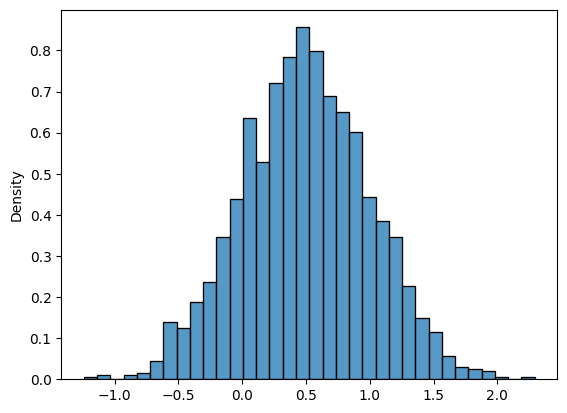

(0.4959521991719742, 0.4973743881358828)

In [ ]:
import numpy as np

sns.histplot(x = flattened_array, stat = 'density')
plt.show()
flattened_array.mean(), np.std(flattened_array)

In [ ]:

df_merged['Total_Receipt'] = pd.to_numeric(df_merged['Total_Receipt'], errors='coerce')
df_merged['Won'] = df_merged['PE WINNER INDICATOR'].apply(lambda x: 1 if x == 'W' else 0)
df_merged = df_merged.dropna(subset=['Total_Receipt', 'Won'])
print(df_merged)

    Cand_State           CANDIDATE NAME TOTAL VOTES PARTY PRIMARY VOTES  \
0           AL          Hightower, Bill         NaN     R        37,283   
1           AL          Castorani, John         NaN     R         1,468   
2           AL          Averhart, James         NaN     D        21,022   
3           AL            Coleman, Jeff         NaN     R        39,804   
4           AL          Taylor, Jessica         NaN     R        20,789   
..         ...                      ...         ...   ...           ...   
692         TX              West, Royce         NaN     D       274,074   
693         TX  McKennon, Kerry Douglas         NaN   LIB             *   
694         WY              Rice, Donna         NaN     R         5,881   
695         WY             Ludwig, Yana         NaN     D         4,931   
696         WY            Wendt, Nathan         NaN     D         4,212   

    PRIMARY % RUNOFF VOTES RUNOFF % GENERAL VOTES  GENERAL %  \
0      37.48%       40,552   47.72%

In [ ]:
treatment = 'Total_Receipt'
outcome = 'Won'
covariates = ['Cand_Party_Affiliation', 'Cand_State', 'Cand_Office']

df_encoded = pd.get_dummies(df_merged[covariates], drop_first=True)
X = pd.concat([df_merged[[treatment]], df_encoded], axis=1)
y = df_merged[outcome]

In [ ]:
print(X.shape)
print(y.shape)
print(X.isnull().sum())
print(y.isnull().sum())

(697, 62)
(697,)
Total_Receipt                 0
Cand_Party_Affiliation_DEM    0
Cand_Party_Affiliation_DFL    0
Cand_Party_Affiliation_GRE    0
Cand_Party_Affiliation_IND    0
                             ..
Cand_State_VA                 0
Cand_State_WA                 0
Cand_State_WI                 0
Cand_State_WY                 0
Cand_Office_S                 0
Length: 62, dtype: int64
0


In [ ]:
print(X.head())
print(y.head())
print(X.shape, y.shape)

   Total_Receipt  Cand_Party_Affiliation_DEM  Cand_Party_Affiliation_DFL  \
0     1323944.09                       False                       False   
1       26809.68                       False                       False   
2       80094.95                        True                       False   
3     2615977.24                       False                       False   
4      476139.02                       False                       False   

   Cand_Party_Affiliation_GRE  Cand_Party_Affiliation_IND  \
0                       False                       False   
1                       False                       False   
2                       False                       False   
3                       False                       False   
4                       False                       False   

   Cand_Party_Affiliation_LIB  Cand_Party_Affiliation_NNE  \
0                       False                       False   
1                       False                       Fa

In [ ]:
!pip install dowhy==0.9.1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.5/174.5 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 45.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 85.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.5/30.5 MB 33.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 82.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 69.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 15.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 570.5/570.5 k

In [ ]:
import pandas as pd
import numpy as np
import re
from dowhy import CausalModel
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/candidate_summary_2020.csv')
house_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/houseelections2020.csv')
sen_2020 = pd.read_csv('/content/drive/MyDrive/D102ProjData/senelections2020.csv')

In [ ]:
# Prepare house and senate data
house_2020 = house_2020[house_2020['CANDIDATE NAME'].notna()].copy()
sen_2020 = sen_2020[sen_2020['CANDIDATE NAME'].notna()].copy()

house_2020['name'] = house_2020['CANDIDATE NAME'].str.upper()
sen_2020['name'] = sen_2020['CANDIDATE NAME'].str.upper()

house_2020['Cand_Office'] = 'H'
sen_2020['Cand_Office'] = 'S'

house_senate_2020 = pd.concat([house_2020, sen_2020], ignore_index=True)
house_senate_2020 = house_senate_2020.rename(columns={"name": "Cand_Name", "STATE ABBREVIATION": "Cand_State"})

# Create a binary Won variable
house_senate_2020['GE WINNER INDICATOR'] = house_senate_2020['GE WINNER INDICATOR'].fillna('')
house_senate_2020['Won'] = np.where(house_senate_2020['GE WINNER INDICATOR'].str.strip().eq('W'), 1, 0)

# Keep necessary columns from data_2020 (ensure Cand_Contribution is present)
data_2020 = data_2020[['Cand_Name', 'Cand_State', 'Cand_Party_Affiliation', 'Cand_Office', 'Total_Receipt', 'Cand_Contribution']]

# Merge finance and voting data
df_merged = house_senate_2020.merge(data_2020, on=['Cand_Name','Cand_Office','Cand_State'], how='inner')

# Convert to numeric
df_merged['Total_Receipt'] = pd.to_numeric(df_merged['Total_Receipt'], errors='coerce')
df_merged['Cand_Contribution'] = pd.to_numeric(df_merged['Cand_Contribution'], errors='coerce')
df_merged['Won'] = pd.to_numeric(df_merged['Won'], errors='coerce')

df_merged = df_merged.dropna(subset=['Total_Receipt', 'Cand_Contribution', 'Won'])

# Define a binary treatment variable
df_merged['High_Profile_Endorsement'] = (df_merged['Cand_Contribution'] > 100000).astype(int)

In [ ]:
# Outcome, treatment, and confounders
outcome = 'Won'
treatment = 'High_Profile_Endorsement'
covariates = ['Cand_Party_Affiliation','Cand_State','Cand_Office','Total_Receipt']

df_merged = df_merged.dropna(subset=covariates+[outcome,treatment])

# Create a dataframe for analysis
df_for_causality = df_merged[[treatment, outcome, 'Cand_Party_Affiliation', 'Cand_State', 'Cand_Office', 'Total_Receipt']].copy()
df_for_causality = pd.get_dummies(df_for_causality, columns=['Cand_Party_Affiliation','Cand_State','Cand_Office'], drop_first=True)

# Example causal graph (adjust as needed)
causal_graph = """
digraph {
    High_Profile_Endorsement;
    Won;
    Total_Receipt;
    Cand_Party_Affiliation_DEM;
    Cand_Party_Affiliation_IND;
    Cand_State_AZ;
    Cand_State_FL;
    Cand_State_MN;
    Cand_State_NV;
    Cand_State_PA;
    Cand_State_WI;
    Cand_Office_S;

    Cand_Party_Affiliation_DEM -> High_Profile_Endorsement;
    Cand_Party_Affiliation_DEM -> Won;

    Cand_Party_Affiliation_IND -> High_Profile_Endorsement;
    Cand_Party_Affiliation_IND -> Won;

    Total_Receipt -> High_Profile_Endorsement;
    Total_Receipt -> Won;

    Cand_State_AZ -> High_Profile_Endorsement;
    Cand_State_AZ -> Won;

    Cand_State_FL -> High_Profile_Endorsement;
    Cand_State_FL -> Won;

    Cand_State_MN -> High_Profile_Endorsement;
    Cand_State_MN -> Won;

    Cand_State_NV -> High_Profile_Endorsement;
    Cand_State_NV -> Won;

    Cand_State_PA -> High_Profile_Endorsement;
    Cand_State_PA -> Won;

    Cand_State_WI -> High_Profile_Endorsement;
    Cand_State_WI -> Won;

    Cand_Office_S -> High_Profile_Endorsement;
    Cand_Office_S -> Won;

    High_Profile_Endorsement -> Won;
}
"""

model = CausalModel(
    data=df_for_causality,
    treatment=treatment,
    outcome=outcome,
    graph=causal_graph
)

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("Causal Effect of High Profile Endorsement on Winning Probability:", estimate.value)

# Refutation
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refutation)

ERROR:dowhy.causal_graph:Error: Pygraphviz cannot be loaded. No module named 'pygraphviz'
Trying pydot ...
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Causal Effect of High Profile Endorsement on Winning Probability: -0.08235289967701609


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Use a Placebo Treatment
Estimated effect:-0.08235289967701609
New effect:0.0004075239954263345
p value:0.96



In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
The following additional packages will be installed:
  libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin libgtk2.0-common libgvc6-plugins-gtk
  librsvg2-common libxdot4
Suggested packages:
  gvfs
The following packages will be REMOVED:
  pkgconf r-base-dev
The following NEW packages will be installed:
  libgail-common libgail18 libgraphviz-dev libgtk2.0-0 libgtk2.0-bin libgtk2.0-common
  libgvc6-plugins-gtk librsvg2-common libxdot4 pkg-config
0 upgraded, 10 newly installed, 2 to remove and 49 not upgraded.
Need to get 2,482 kB of archives.
After this operation, 7,670 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 pkg-config a

In [ ]:
# Outcome, treatment, and confounders
outcome = 'Won'
treatment = 'High_Profile_Endorsement'
covariates = ['Cand_Party_Affiliation','Cand_State','Cand_Office','Total_Receipt']

df_merged = df_merged.dropna(subset=covariates+[outcome,treatment])

# Create a dataframe for analysis
df_for_causality = df_merged[[treatment, outcome, 'Cand_Party_Affiliation', 'Cand_State', 'Cand_Office', 'Total_Receipt']].copy()
df_for_causality = pd.get_dummies(df_for_causality, columns=['Cand_Party_Affiliation','Cand_State','Cand_Office'], drop_first=True)

# Example causal graph (adjust as needed)
causal_graph = """
digraph {
    High_Profile_Endorsement;
    Won;
    Total_Receipt;
    Cand_Party_Affiliation_DEM;
    Cand_Party_Affiliation_IND;
    Cand_State_AZ;
    Cand_State_FL;
    Cand_State_MN;
    Cand_State_NV;
    Cand_State_PA;
    Cand_State_WI;
    Cand_Office_S;

    Cand_Party_Affiliation_DEM -> High_Profile_Endorsement;
    Cand_Party_Affiliation_DEM -> Won;

    Cand_Party_Affiliation_IND -> High_Profile_Endorsement;
    Cand_Party_Affiliation_IND -> Won;

    Total_Receipt -> High_Profile_Endorsement;
    Total_Receipt -> Won;

    Cand_State_AZ -> High_Profile_Endorsement;
    Cand_State_AZ -> Won;

    Cand_State_FL -> High_Profile_Endorsement;
    Cand_State_FL -> Won;

    Cand_State_MN -> High_Profile_Endorsement;
    Cand_State_MN -> Won;

    Cand_State_NV -> High_Profile_Endorsement;
    Cand_State_NV -> Won;

    Cand_State_PA -> High_Profile_Endorsement;
    Cand_State_PA -> Won;

    Cand_State_WI -> High_Profile_Endorsement;
    Cand_State_WI -> Won;

    Cand_Office_S -> High_Profile_Endorsement;
    Cand_Office_S -> Won;

    High_Profile_Endorsement -> Won;
}
"""

model = CausalModel(
    data=df_for_causality,
    treatment=treatment,
    outcome=outcome,
    graph=causal_graph
)

identified_estimand = model.identify_effect()
estimate = model.estimate_effect(
    identified_estimand,
    method_name="backdoor.linear_regression"
)

print("Causal Effect of High Profile Endorsement on Winning Probability:", estimate.value)

# Refutation
refutation = model.refute_estimate(identified_estimand, estimate, method_name="placebo_treatment_refuter")
print(refutation)

/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


Causal Effect of High Profile Endorsement on Winning Probability: -0.08235289967701609


/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]
/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

Refute: Use a Placebo Treatment
Estimated effect:-0.08235289967701609
New effect:0.0030267675240750434
p value:0.82



/usr/local/lib/python3.10/dist-packages/dowhy/causal_estimators/regression_estimator.py:133: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intercept_parameter = self.model.params[0]


In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
!apt-get install -y graphviz libgraphviz-dev pkg-config
!pip install pygraphviz

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
pkg-config is already the newest version (0.29.2-1ubuntu3).
graphviz is already the newest version (2.42.2-6ubuntu0.1).
libgraphviz-dev is already the newest version (2.42.2-6ubuntu0.1).
The following packages were automatically installed and are no longer required:
  libbz2-dev libpkgconf3 libreadline-dev
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


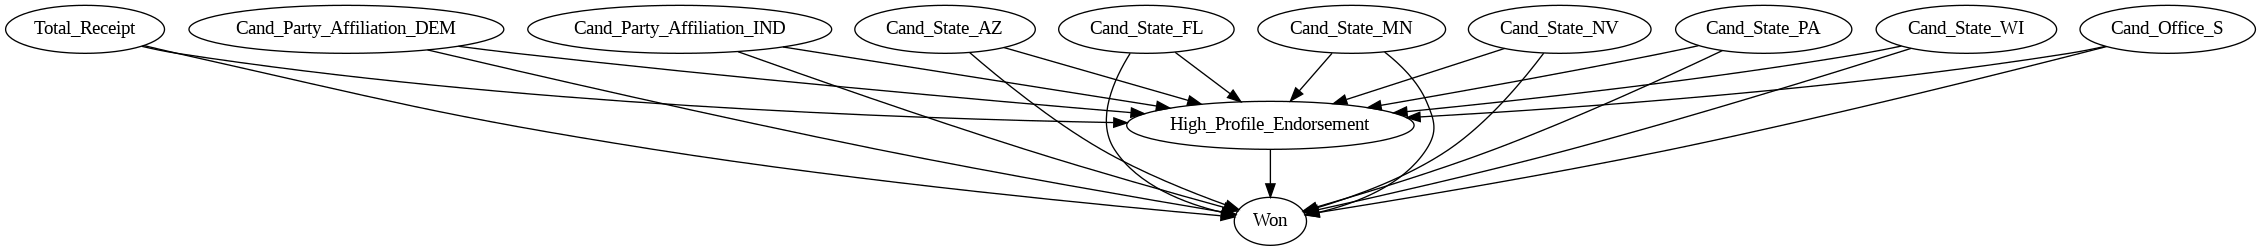

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph
from IPython.display import Image, display

A = to_agraph(model._graph._graph)
A.draw('causal_graph.png', prog='dot')
display(Image(filename='causal_graph.png'))

In [ ]:
!pip install --upgrade pandas


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 25.5 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.27.0 requires scikit-learn>=1.2.2, but you have scikit-learn 1.1.3 which is incompatible.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 2.2.3 which is incompatible.
dowhy 0.9.1 requires pandas<2.0.0,>=1.4.3, but you have pandas 2.2.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
mlxtend 0.23.3 requires scikit-learn>=1.3.1, but you have scikit-learn 1.1.3 which is incompatible.
plotnine 0.14.3 requires sta

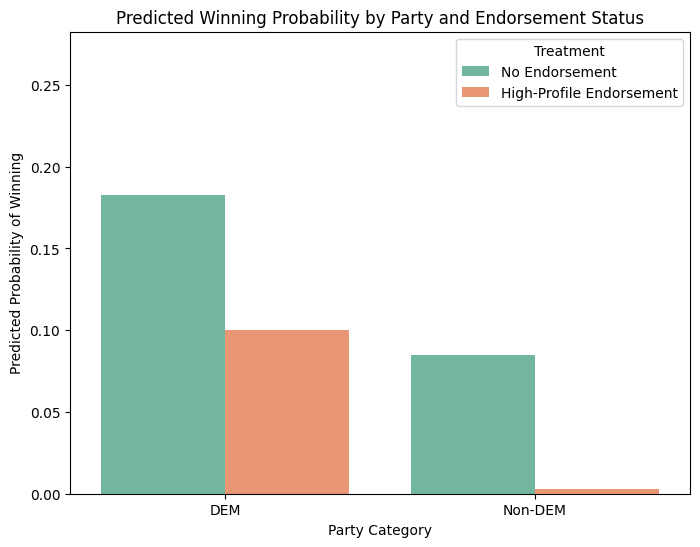

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

ate = estimate.value

# Create a categorical variable for Party
df_for_causality['Party_Category'] = np.where(df_for_causality['Cand_Party_Affiliation_DEM']==1, 'DEM', 'Non-DEM')

# Compute baseline winning probability (no endorsement) by Party
baseline_party = df_for_causality[df_for_causality['High_Profile_Endorsement']==0].groupby('Party_Category')['Won'].mean().reset_index()

# Add predicted winning probability with endorsement (baseline + ATE)
baseline_party['Won_With_Endorsement'] = baseline_party['Won'] + ate
baseline_party['Won_With_Endorsement'] = baseline_party['Won_With_Endorsement'].clip(0,1) # ensure [0,1]

# Melt for plotting
melted = pd.melt(baseline_party, id_vars='Party_Category', value_vars=['Won','Won_With_Endorsement'],
                 var_name='Scenario', value_name='Predicted_Probability')

# Rename scenarios for clarity
melted['Scenario'] = melted['Scenario'].replace({
    'Won': 'No Endorsement',
    'Won_With_Endorsement': 'High-Profile Endorsement'
})

plt.figure(figsize=(8,6))
sns.barplot(x='Party_Category', y='Predicted_Probability', hue='Scenario', data=melted, palette='Set2')
plt.title('Predicted Winning Probability by Party and Endorsement Status')
plt.xlabel('Party Category')
plt.ylabel('Predicted Probability of Winning')
plt.ylim(0, max(melted['Predicted_Probability'])+0.1)
plt.legend(title='Treatment')
plt.show()

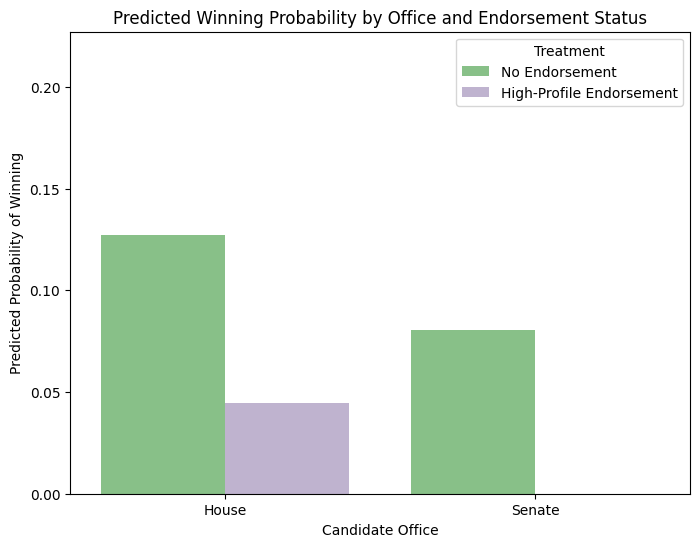

In [ ]:
# Create a categorical variable for Office based on Cand_Office_S (1 = Senate, 0 = House)
df_for_causality['Office_Category'] = np.where(df_for_causality['Cand_Office_S']==1, 'Senate', 'House')

# Compute baseline winning probability (no endorsement) by Office
baseline_office = df_for_causality[df_for_causality['High_Profile_Endorsement']==0].groupby('Office_Category')['Won'].mean().reset_index()

# Add predicted winning probability with endorsement
baseline_office['Won_With_Endorsement'] = baseline_office['Won'] + ate
baseline_office['Won_With_Endorsement'] = baseline_office['Won_With_Endorsement'].clip(0,1)

# Melt for plotting
melted_office = pd.melt(baseline_office, id_vars='Office_Category', value_vars=['Won','Won_With_Endorsement'],
                        var_name='Scenario', value_name='Predicted_Probability')

# Rename scenarios
melted_office['Scenario'] = melted_office['Scenario'].replace({
    'Won': 'No Endorsement',
    'Won_With_Endorsement': 'High-Profile Endorsement'
})

plt.figure(figsize=(8,6))
sns.barplot(x='Office_Category', y='Predicted_Probability', hue='Scenario', data=melted_office, palette='Accent')
plt.title('Predicted Winning Probability by Office and Endorsement Status')
plt.xlabel('Candidate Office')
plt.ylabel('Predicted Probability of Winning')
plt.ylim(0, max(melted_office['Predicted_Probability'])+0.1)
plt.legend(title='Treatment')
plt.show()

In [ ]:
import statsmodels.api as sm
import numpy as np

# Start with a very minimal set of confounders, maybe even none at first
confounders = []  # Try no confounders, just the treatment
X = df_for_causality[['High_Profile_Endorsement'] + confounders].copy()
X = sm.add_constant(X)
y = df_for_causality['Won']

model_logit = sm.Logit(y, X).fit(disp=False)
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 1137
Model:                          Logit   Df Residuals:                     1135
Method:                           MLE   Df Model:                            1
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                0.001398
Time:                        19:27:01   Log-Likelihood:                -415.73
converged:                       True   LL-Null:                       -416.32
Covariance Type:            nonrobust   LLR p-value:                    0.2807
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -1.9843      0.092    -21.618      0.000      -2.164      -1.804
High_Profile_Endorsement    -0.9601      1.030     -0.932      0.351      -2.979       1.

In [ ]:
confounders = ['Total_Receipt']  # Add one confounder
X = df_for_causality[['High_Profile_Endorsement'] + confounders].copy()
X = sm.add_constant(X)
model_logit = sm.Logit(y, X).fit(disp=False)
print(model_logit.summary())

                           Logit Regression Results                           
Dep. Variable:                    Won   No. Observations:                 1137
Model:                          Logit   Df Residuals:                     1134
Method:                           MLE   Df Model:                            2
Date:                Mon, 16 Dec 2024   Pseudo R-squ.:                 0.03172
Time:                        19:27:02   Log-Likelihood:                -403.11
converged:                       True   LL-Null:                       -416.32
Covariance Type:            nonrobust   LLR p-value:                 1.839e-06
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -2.0860      0.096    -21.632      0.000      -2.275      -1.897
High_Profile_Endorsement    -0.9565      1.031     -0.928      0.353      -2.976       1.

In [ ]:
X_no = X.copy()
X_no['High_Profile_Endorsement'] = 0
X_yes = X.copy()
X_yes['High_Profile_Endorsement'] = 1

pred_no = model_logit.predict(X_no)
pred_yes = model_logit.predict(X_yes)

df_for_causality['Predicted_Probability_No_Endorsement'] = pred_no
df_for_causality['Predicted_Probability_Endorsement'] = pred_yes

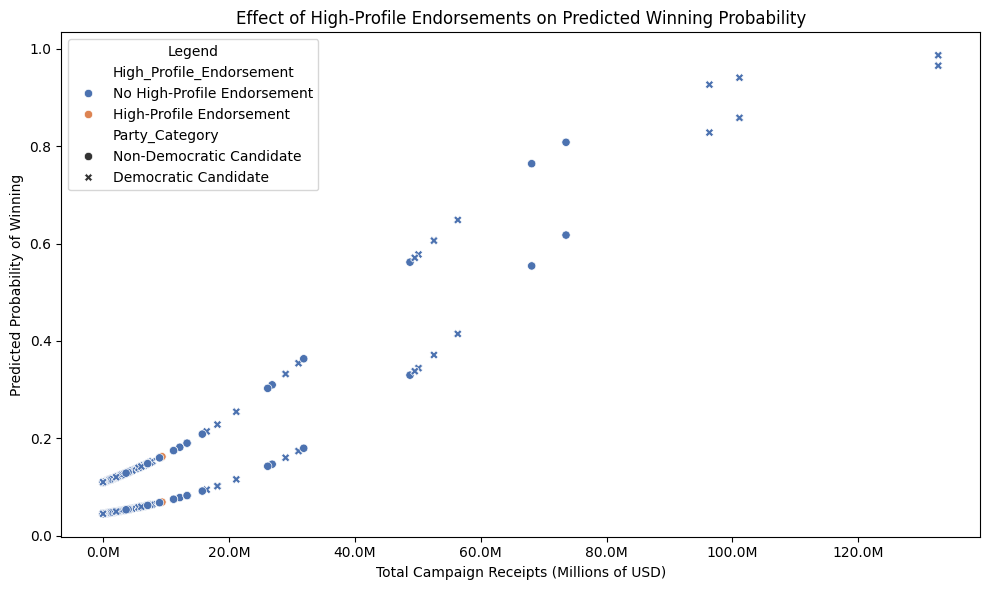

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
plot_df = df_for_causality[['Total_Receipt', 'Predicted_Probability_No_Endorsement', 'Predicted_Probability_Endorsement', 'High_Profile_Endorsement', 'Party_Category']].copy()
plot_df = plot_df.rename(columns={'Predicted_Probability_No_Endorsement': 'Predicted_Probability'})  # For plotting purposes

plot_df2 = df_for_causality[['Total_Receipt', 'Predicted_Probability_No_Endorsement', 'Predicted_Probability_Endorsement', 'High_Profile_Endorsement', 'Party_Category']].copy()
plot_df2 = plot_df2.rename(columns={'Predicted_Probability_Endorsement': 'Predicted_Probability'})  # For plotting purposes

plot_df = pd.concat([plot_df, plot_df2])
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Total_Receipt',
    y='Predicted_Probability',
    hue='High_Profile_Endorsement',
    style='Party_Category',
    data=plot_df,
    palette='deep'
)

plt.title('Effect of High-Profile Endorsements on Predicted Winning Probability')

# If the data is in raw dollars and 0.2 = 200,000,000 USD (0.2 * 1e9),
# adjust this function accordingly. For example, if 1.0 on axis = 1e8 USD:
# then x=0.2 on the plot = 0.2 * 1e8 = 20,000,000 USD (20M).
def to_millions(x, pos):
    return f'{x/1e6:.1f}M'  # Convert to millions

plt.gca().xaxis.set_major_formatter(FuncFormatter(to_millions))
plt.xlabel('Total Campaign Receipts (Millions of USD)')
plt.ylabel('Predicted Probability of Winning')

# Update legend labels
current_handles, current_labels = plt.gca().get_legend_handles_labels()
new_labels = []
for label in current_labels:
    if label == '0':
        new_labels.append('No High-Profile Endorsement')
    elif label == '1':
        new_labels.append('High-Profile Endorsement')
    elif label == 'Non-DEM':
        new_labels.append('Non-Democratic Candidate')
    elif label == 'DEM':
        new_labels.append('Democratic Candidate')
    else:
        new_labels.append(label)

plt.legend(current_handles, new_labels, title='Legend', loc='best')
plt.tight_layout()
plt.show()

In [ ]:
df_merged



---



## Past Work (not used)

### 2023/2024 Data

In [ ]:
data_2023_2024 = pd.read_csv('/content/drive/MyDrive/candidate_summary_2024.csv')

In [ ]:
print(data_2023_2024.head())

checking for missing values

In [ ]:
print(data_2023_2024 .isnull().sum())

In [ ]:
# dropping columns with a lot of missing values.
threshold = 0.5 * len(data_2023_2024)
data_clean = data_2023_2024.dropna(thresh=threshold, axis=1)
print(data_clean.isnull().sum())

In [ ]:
#to handle more missing values for cand_party_affiliation and cand_incumbent_challenger_open_seat
for i in ['Cand_Party_Affiliation', 'Cand_Incumbent_Challenger_Open_Seat']:
    data_clean.loc[:, i] = data_clean[i].fillna(data_clean[i].mode()[0])
numerical_columns = ['Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 'Debt_Owe_To_Committee']
for j in ['Cash_On_Hand_COP', 'Debt_Owed_By_Committee', 'Debt_Owe_To_Committee']:
    data_clean.loc[:, j] = data_clean[j].fillna(data_clean[j].mean())

In [ ]:
print(data_clean.isnull().sum())

In [ ]:
data_clean = data_clean.dropna()

In [ ]:
print(data_clean.isnull().sum())

In [ ]:
from google.colab import drive
drive.mount('/content/drive')